In [ ]:
import scanpy as sc
adata_discovery = sc.read_h5ad("/scratch/user/s4735100/Discovery_cohort.h5ad")
adata_discovery

In [ ]:
adata_replication=sc.read_h5ad("/scratch/user/s4735100/Replication_cohort.h5ad")
adata_replication

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
samples_to_keep = ["5892STDY8039745","5892STDY8356974","5892STDY8357646","5892STDY8357647"]
moderate_adata_discovery = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep)]

In [ ]:
moderate_adata_discovery

In [ ]:
moderate_adata_discovery.obs['sanger_sample_id']. unique()

In [ ]:
samples_to_keep_2 = ["5892STDY10315937","5892STDY8966205"]
moderate_adata_replication = adata_replication[adata_replication.obs["sanger_sample_id"].isin(samples_to_keep_2)]

In [ ]:
moderate_adata_replication.obs['sanger_sample_id']. unique()

In [ ]:
adata_moderate = sc.concat(
    [moderate_adata_discovery, moderate_adata_replication], 
    join='outer',  # or 'inner'
    index_unique=None)

In [ ]:
adata_moderate.obs['sanger_sample_id']. unique()

In [ ]:
moderate_file = '/scratch/user/s4735100/moderate.h5ad'
adata_moderate.write(moderate_file)

In [ ]:
import scanpy as sc 
import pandas as pd 
import numpy as np 
import os
import anndata
from umap import UMAP

In [ ]:
adata_moderate =sc.read_h5ad("/scratch/user/s4735100/moderate.h5ad")

In [ ]:
 adata_moderate.X[:20, :20].toarray()

In [ ]:
sc.tl.pca(adata_moderate, svd_solver="arpack")

In [ ]:
sc.pl.pca(adata_moderate, color="leiden")

In [ ]:
sc.pl.pca_variance_ratio(adata_moderate, log=True)

In [ ]:
sc.pp.neighbors(adata_moderate, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.leiden(adata_moderate)
sc.tl.paga(adata_moderate)
sc.pl.paga(adata_moderate) # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_moderate, init_pos='paga')

In [ ]:
sc.tl.umap(adata_moderate)

In [ ]:
sc.pl.umap(adata_moderate, color=['sanger_sample_id','leiden'], legend_loc='on data')

In [ ]:
pip install harmonypy

In [ ]:
sc.external.pp.harmony_integrate(adata_moderate, key="sanger_sample_id", basis='X_pca', adjusted_basis='X_pca_harmony', )

In [ ]:
sc.pp.neighbors(adata_moderate, n_neighbors=10, n_pcs=40, use_rep="X_pca_harmony")

In [ ]:
sc.tl.leiden(adata_moderate)
sc.tl.umap(adata_moderate)

In [ ]:
sc.pl.umap(adata_moderate, color=['leiden'], legend_loc='on data')

In [ ]:
samples_to_keep_3 = ["5892STDY11765580","OTARscRNA12147507"]
adata_severe = adata_replication[adata_replication.obs["sanger_sample_id"].isin(samples_to_keep_3)]

In [ ]:
adata_severe

In [ ]:
adata_severe.obs['sanger_sample_id']. unique()

In [ ]:
severe_file = '/scratch/user/s4735100/severe.h5ad'
adata_severe.write(severe_file)

In [15]:
adata_severe =sc.read_h5ad("/scratch/user/s4735100/severe.h5ad")

In [16]:
sc.tl.pca(adata_severe, svd_solver="arpack")

In [17]:
print(adata_severe.obs.columns)

Index(['sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex',
       'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot',
       'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot',
       'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts',
       'n_genes_by_counts', 'normalization_factor',
       'pct_counts_gene_group__mito_transcript', 'cell_passes_qc',
       'scrublet__multiplet_scores', 'scrublet__predicted_multiplet',
       'predicted_celltype_probability', 'major_cell_type',
       'predicted_celltype', 'label__machine', 'category__machine',
       'medication_class', 'disease_status__machine'],
      dtype='object')


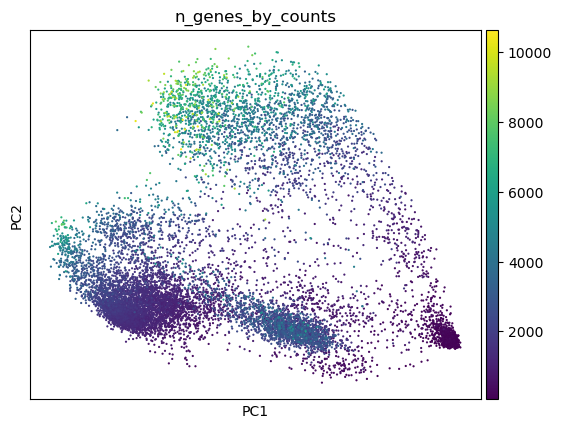

In [18]:
sc.pl.pca(adata_severe, color="n_genes_by_counts")

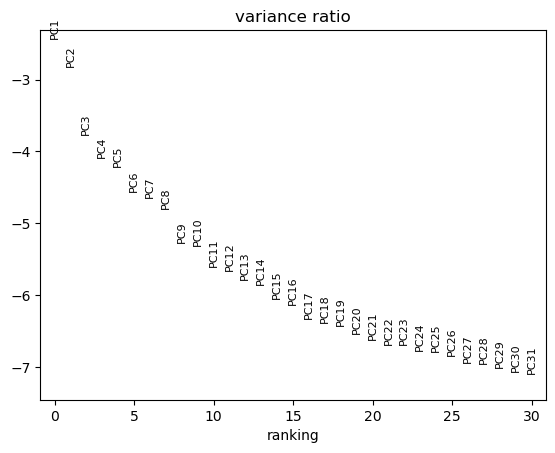

In [19]:
sc.pl.pca_variance_ratio(adata_severe, log=True)

In [20]:
sc.pp.neighbors(adata_severe, n_neighbors=10, n_pcs=40)


In [21]:
sc.tl.leiden(
    adata_severe,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

In [22]:
sc.tl.paga(adata_severe)
sc.pl.paga(adata_severe, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_severe, init_pos='paga')

In [23]:
sc.tl.umap(adata_severe)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


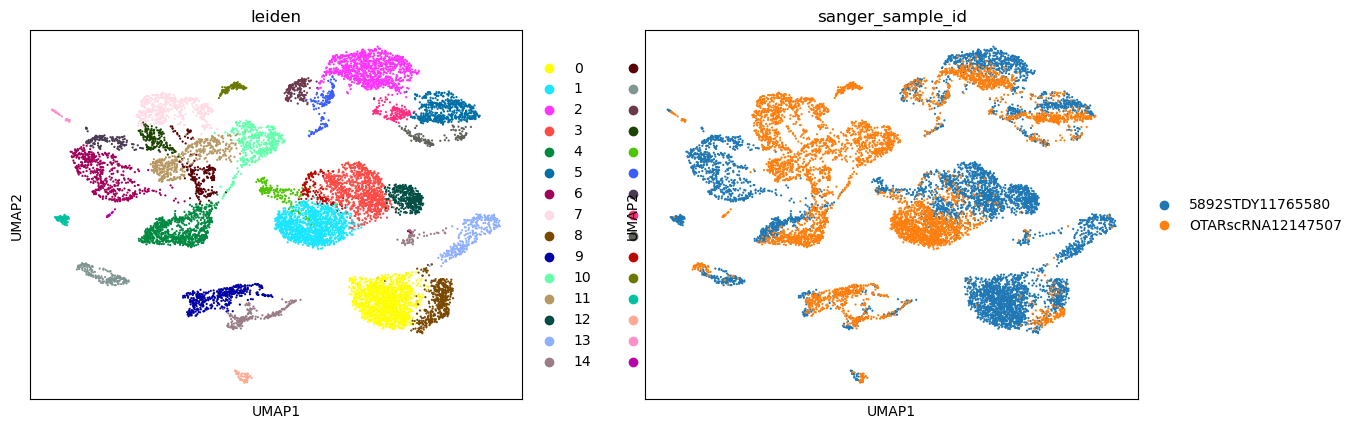

In [24]:
sc.pl.umap(adata_severe, color=["leiden","sanger_sample_id"])

In [25]:
pip install harmonypy

Note: you may need to restart the kernel to use updated packages.


In [26]:
sc.external.pp.harmony_integrate(adata_severe, key="sanger_sample_id", basis='X_pca', adjusted_basis='X_pca_harmony', )

2024-04-13 14:28:41,707 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-13 14:28:47,416 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-13 14:28:47,541 - harmonypy - INFO - Iteration 1 of 10
2024-04-13 14:28:51,141 - harmonypy - INFO - Iteration 2 of 10
2024-04-13 14:28:55,041 - harmonypy - INFO - Iteration 3 of 10
2024-04-13 14:28:58,604 - harmonypy - INFO - Iteration 4 of 10
2024-04-13 14:29:02,159 - harmonypy - INFO - Iteration 5 of 10
2024-04-13 14:29:05,638 - harmonypy - INFO - Converged after 5 iterations


In [27]:
sc.pp.neighbors(adata_severe, n_neighbors=10, n_pcs=40, use_rep="X_pca_harmony")

In [28]:
sc.tl.leiden(adata_severe)
sc.tl.umap(adata_severe)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


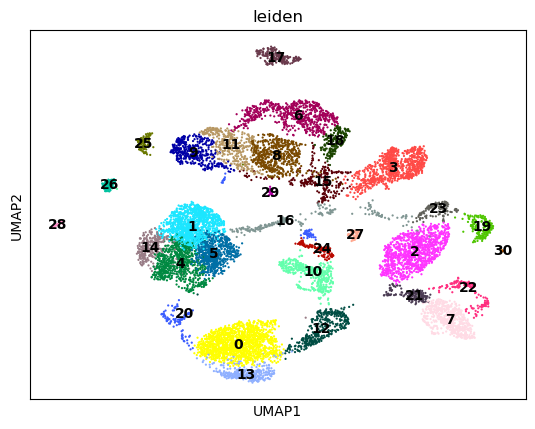

In [29]:
sc.pl.umap(adata_severe, color=['leiden'], legend_loc='on data')